# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [ ]:
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import panel as pn
from panel.interact import interact
from panel import widgets

In [2]:
# Set plot style for basic charts
plt.style.use('seaborn')

# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("MAPBOX_API_KEY")
px.set_mapbox_access_token(map_box_api)

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")

# Preview the dataframe
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [4]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
dwelling_types_per_year = (
    to_data
    .groupby([to_data.index])
    .sum()
)

# Make the year the index
dwelling_types_per_year.drop(columns=[
        'average_house_value', 
        'shelter_costs_owned', 
        'shelter_costs_rented'
    ], 
    inplace=True
)

# Preview the dataframe
dwelling_types_per_year.head()

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [5]:
# Save the dataframe as a csv file
dwelling_types_per_year.to_csv('toronto_dwelling_types_per_year.csv')

In [6]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """
    data = pd.DataFrame(data)

    # Plot data on a bar chart
    ax = data.plot.bar(
        xlabel=xlabel, 
        ylabel=ylabel, 
        color=color, 
        title=title, 
        figsize=(10,5), 
        rot=65
    )

    # Remove the legend
    ax.get_legend().remove()

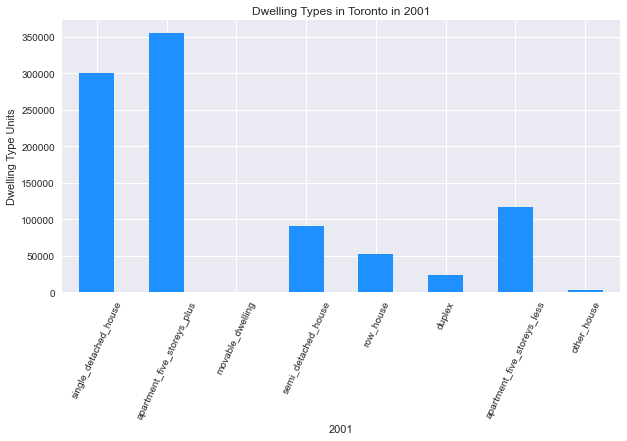

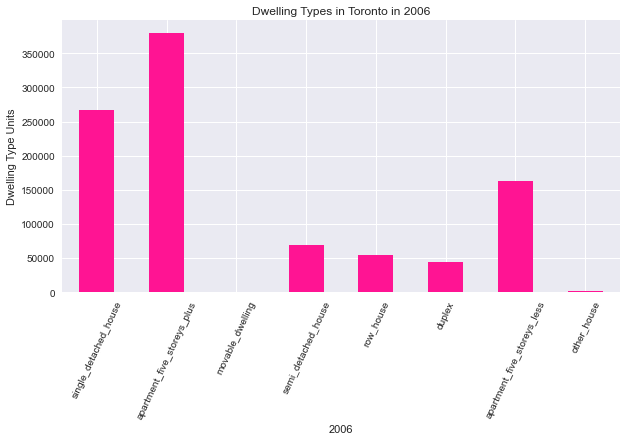

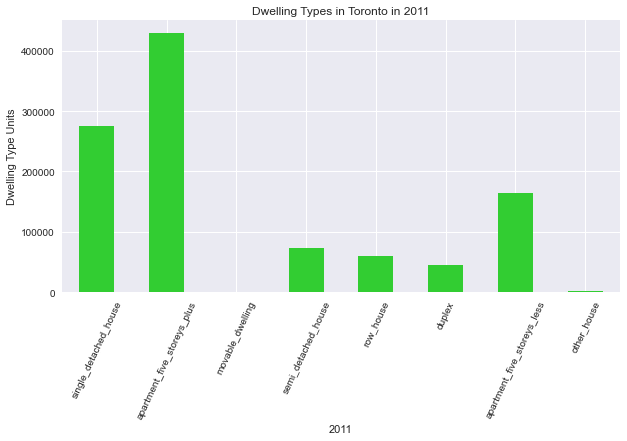

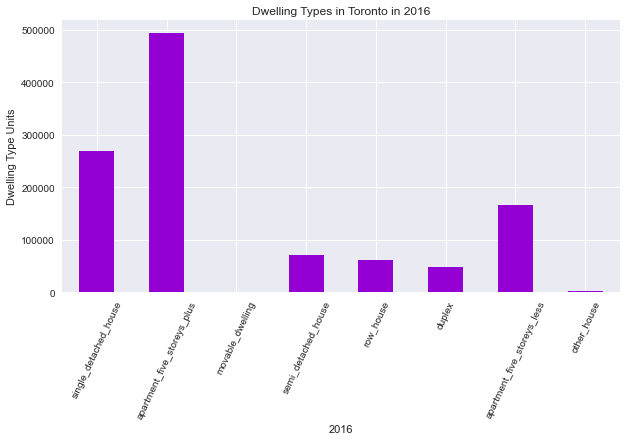

In [7]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
create_bar_chart(
    dwelling_types_per_year.loc[2001], 
    'Dwelling Types in Toronto in 2001', 
    '2001', 
    'Dwelling Type Units', 
    'DodgerBlue'
)

# Bar chart for 2006
create_bar_chart(
    dwelling_types_per_year.loc[2006], 
    'Dwelling Types in Toronto in 2006', 
    '2006', 
    'Dwelling Type Units', 
    'DeepPink'
)

# Bar chart for 2011
create_bar_chart(
    dwelling_types_per_year.loc[2011], 
    'Dwelling Types in Toronto in 2011', 
    '2011', 
    'Dwelling Type Units', 
    'LimeGreen'
)

# Bar chart for 2016
create_bar_chart(
    dwelling_types_per_year.loc[2016], 
    'Dwelling Types in Toronto in 2016', 
    '2016', 
    'Dwelling Type Units', 
    'DarkViolet'
)


- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [8]:
# Calculate the average monthly shelter costs for owned and rented dwellings
shelter_costs_per_year = (
    to_data[['shelter_costs_owned', 'shelter_costs_rented']]
    .groupby([to_data.index])
    .mean()
    .round(2)
)

# Preview the dataframe
shelter_costs_per_year.head()

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.88,1085.94
2006,1316.80,925.41
2011,1448.21,1019.79
2016,1761.31,1256.32


In [9]:
# Helper create_line_chart function
def create_line_chart(data, title, xlabel, ylabel, color):
    """
    Create a line chart based in the data argument.
    """
    data = pd.DataFrame(data)
    ax = data.plot(xlabel=xlabel, ylabel=ylabel, color=color, title=title, figsize=(15,5))
    ax.get_legend().remove()

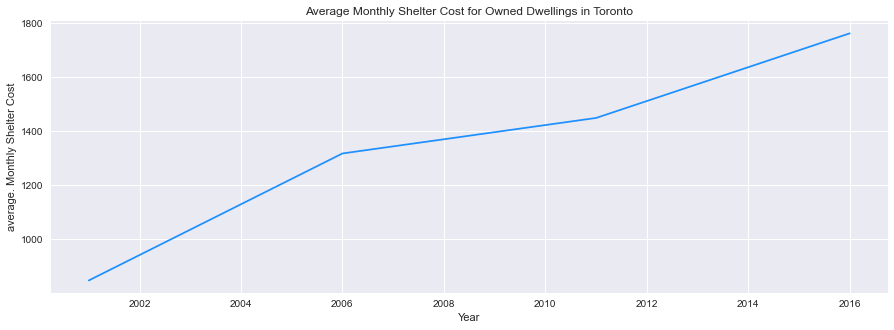

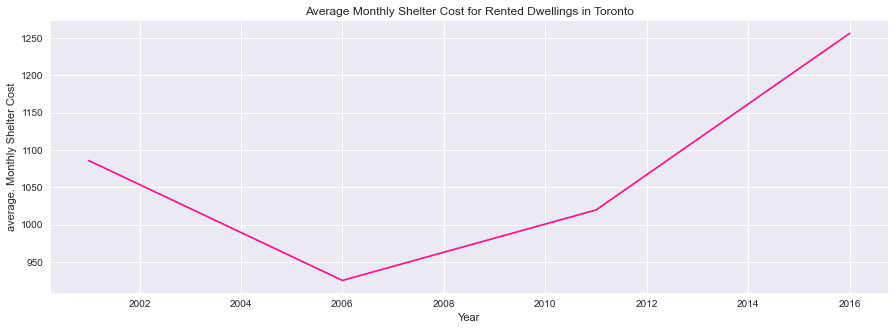

In [10]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
create_line_chart(
    shelter_costs_per_year[['shelter_costs_owned']], 
    'Average Monthly Shelter Cost for Owned Dwellings in Toronto', 
    'Year', 
    'average. Monthly Shelter Cost', 
    'DodgerBlue'
)

# Line chart for rented dwellings
create_line_chart(
    shelter_costs_per_year[['shelter_costs_rented']], 
    'Average Monthly Shelter Cost for Rented Dwellings in Toronto', 
    'Year', 
    'average. Monthly Shelter Cost', 
    'DeepPink'
)


## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a line chart.

In [11]:
# Calculate the average house value per year
average_house_value_per_year = (
    to_data[['average_house_value']]
    .groupby([to_data.index])
    .mean()
    .round(2)
)

# Preview the dataframe
average_house_value_per_year.head()

,average_house_value
year,
2001,289882.89
2006,424059.66
2011,530424.72
2016,664068.33


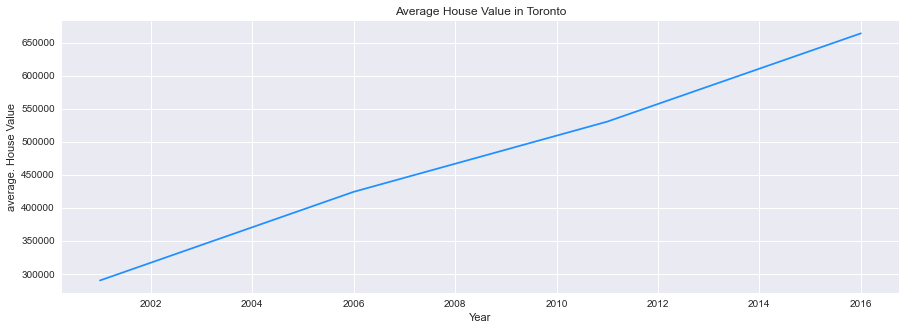

In [12]:
# Plot the average house value per year as a line chart
create_line_chart(
    average_house_value_per_year, 
    'Average House Value in Toronto', 
    'Year', 
    'average. House Value', 
    'DodgerBlue'
)

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [13]:
# Create a new DataFrame with the mean house values by neighbourhood per year
average_house_value_per_neighbourhood = (
    to_data[['neighbourhood', 'average_house_value']]
    .groupby([to_data.index, 'neighbourhood'])
    .mean()
    .astype(int, copy=True)
)

# Preview the dataframe
average_house_value_per_neighbourhood.head()

average_house_value
year neighbourhood                                    
2001 Agincourt North                            200388
     Agincourt South-Malvern West               203047
     Alderwood                                  259998
     Annex                                      453850
     Banbury-Don Mills                          371864

In [14]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
average_house_value_per_neighbourhood.hvplot.line(x='year', y='average_house_value', groupby='neighbourhood', color='DodgerBlue')

BokehModel(combine_events=True, render_bundle={'docs_json': {'84b63724-1657-482a-8a87-ee67b8534ccb': {'defs': …

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [15]:
# Remove unneeded columns
dwelling_types = to_data.drop(columns=to_data.iloc[:,9:])

# Fetch the data of all dwelling types per year
dwelling_types_per_year = (
    dwelling_types
    .groupby([dwelling_types.index, 'neighbourhood'])
    .mean()
    .astype(int)
)

In [16]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
dwelling_types_per_year.hvplot.bar(x='year', xlabel='Year', ylabel='Dwelling Type Units', rot=90, groupby='neighbourhood', height=500)

BokehModel(combine_events=True, render_bundle={'docs_json': {'9395d8d1-c34b-4ef7-ba80-b00557ef7d41': {'defs': …

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [17]:
# Getting the data from the top 10 expensive neighbourhoods
most_expensive_neighbourhoods = (
    to_data[['neighbourhood', 'average_house_value']]
    .groupby(['neighbourhood'])
    .mean()
    .sort_values(by='average_house_value', ascending=False)
)

# Select the top 10 expensive neighbourhoods
top_ten_expensive_neighbourhoods = most_expensive_neighbourhoods[:10]

# Preview the dataframe
top_ten_expensive_neighbourhoods.head()

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00


In [18]:
# Plotting the data from the top 10 expensive neighbourhoods
top_ten_expensive_neighbourhoods.hvplot.bar(rot=90, height=500)

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [19]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
neighbourhood_locations = pd.read_csv(file_path)

# Preview the dataframe
neighbourhood_locations.head()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [28]:
# Calculate the mean values for each neighbourhood
neighbourhood_mean_values = (
    to_data
    .groupby(['neighbourhood'])
    .mean()
)

# Join the average values with the neighbourhood locations
merged_neighbourhood_data = neighbourhood_locations.merge(neighbourhood_mean_values, left_on='neighbourhood', right_on='neighbourhood')

# Preview the dataframe
merged_neighbourhood_data.head()

,neighbourhood,lat,lon,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
0,Agincourt North,43.805441,-79.266712,3435.00,1947.50,2.50,863.75,1406.25,512.50,547.50,10.00,329811.5,1109.00,983.50
1,Agincourt South-Malvern West,43.788658,-79.265612,2897.50,2180.00,1.25,375.00,456.25,523.75,628.75,32.50,334189.0,1131.25,985.00
2,Alderwood,43.604937,-79.541611,2903.75,302.50,1.25,503.75,76.25,302.50,502.50,1.25,427922.5,1166.75,1003.25
3,Annex,43.671585,-79.404001,751.25,7235.00,1.25,1375.00,613.75,355.00,4605.00,83.75,746977.0,1692.75,1315.25
4,Banbury-Don Mills,43.737657,-79.349718,3572.50,5388.75,1.25,273.75,626.25,32.50,1340.00,0.00,612039.0,1463.50,1242.75


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

In [22]:
# Create a scatter mapbox to analyze neighbourhood info
average_values_scatter_plot = px.scatter_mapbox(
    merged_neighbourhood_data,
    lat='lat',
    lon='lon',
    color='average_house_value',
    size='average_house_value',
    color_continuous_scale='Viridis',
    size_max=11,
    zoom=9.2,
    hover_data={
        'neighbourhood': True,
        'lat': False,
        'lon': False
    }
)

# Render the scatter plot
average_values_scatter_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

In [23]:
# Get the average neighbourhood house value per year
df_row_facet = average_house_value_per_neighbourhood.reset_index()

# Rename columns for presentation
df_row_facet.columns = ['Year', 'Neighbourhood', 'Avg. House Value']

# Preview the dataframe
df_row_facet.head()

,Year,Neighbourhood,Avg. House Value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864


In [24]:
# Create bar chart row facet plot figure
average_values_bar_chart = px.bar(
    df_row_facet,
    x='Neighbourhood', 
    y='Avg. House Value', 
    color='Avg. House Value', 
    facet_row='Year',
    height=1000,
    title="Average House Values in Toronto per Neighbourhood"
)

# Display the bar chart
average_values_bar_chart.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [25]:
# Fetch the data from all expensive neighbourhoods per year.
most_expensive_neighbourhoods_per_year = (
    to_data
    .groupby([to_data.index, 'neighbourhood'])
    .mean()
    .sort_values(by=['year', 'average_house_value'], ascending=False)
    .reset_index()
)

In [26]:
# Get the top ten most expensive neighbourhoods for each year
top_ten_2001 = most_expensive_neighbourhoods_per_year[most_expensive_neighbourhoods_per_year['year'] == 2001][:10]
top_ten_2011 = most_expensive_neighbourhoods_per_year[most_expensive_neighbourhoods_per_year['year'] == 2011][:10]
top_ten_2006 = most_expensive_neighbourhoods_per_year[most_expensive_neighbourhoods_per_year['year'] == 2006][:10]
top_ten_2016 = most_expensive_neighbourhoods_per_year[most_expensive_neighbourhoods_per_year['year'] == 2016][:10]

# Join the dataframes
top_ten_expensive_neighbourhoods_per_year = pd.concat(
    [top_ten_2001, top_ten_2006, top_ten_2011, top_ten_2016], 
    join='inner', 
    axis='rows'
)

In [27]:
# Create the sunburst chart figure
top_ten_sunburst_chart = px.sunburst(
    top_ten_expensive_neighbourhoods_per_year, 
    path=['year', 'neighbourhood'], 
    values='average_house_value', 
    color='average_house_value', 
    color_continuous_scale='blues',
)

# Plot the chart
top_ten_sunburst_chart.show()